In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as stats
from scipy.stats import ttest_1samp
from scipy.stats import norm

In [2]:
data = pd.read_csv("all_data.csv")
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
data['GDP'].describe()

count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64

In [4]:
data = data.rename(columns = {'Life expectancy at birth (years)':'life_expectancy'})

In [5]:
data_pivot = data.pivot(columns = 'Year', index = 'Country', values = 'life_expectancy')

In [6]:
print(data_pivot.head())

Year                      2000  2001  2002  2003  2004  2005  2006  2007  \
Country                                                                    
Chile                     77.3  77.3  77.8  77.9  78.0  78.4  78.9  78.9   
China                     71.7  72.2  72.7  73.1  73.5  73.9  74.2  74.4   
Germany                   78.0  78.3  78.4  78.5  79.1  79.2  79.6  79.8   
Mexico                    74.8  75.0  75.0  75.0  75.4  75.3  75.8  76.0   
United States of America  76.8  76.9  77.0  77.2  77.5  77.5  77.8  78.1   

Year                      2008  2009  2010  2011  2012  2013  2014  2015  
Country                                                                   
Chile                     79.6  79.3  79.1  79.8  79.9  80.1  80.3  80.5  
China                     74.5  74.9  75.0  75.2  75.4  75.6  75.8  76.1  
Germany                   79.9  80.0  80.1  80.5  80.6  80.6  80.9  81.0  
Mexico                    75.6  75.7  75.6  76.1  76.3  76.6  76.6  76.7  
United States of 

In [7]:
data['Year'] = data['Year'].astype('int64')

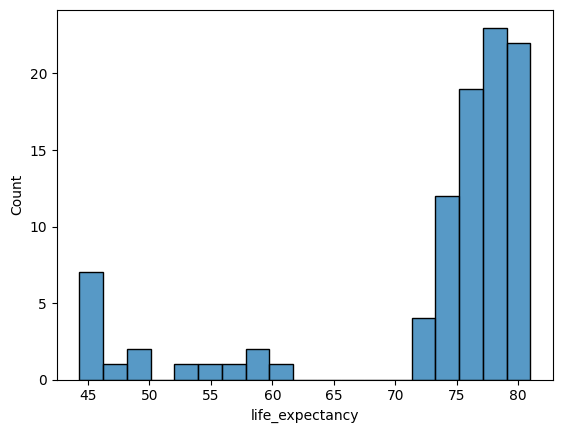

<Figure size 640x480 with 0 Axes>

In [69]:
plt.figure()
sns.histplot(data.life_expectancy)
plt.show()
plt.clf()

In [9]:
data_without_zimb = data[data.Country != 'Zimbabwe']
print(data_without_zimb.describe())

              Year  life_expectancy           GDP
count    80.000000        80.000000  8.000000e+01
mean   2007.500000        77.328750  4.654786e+12
std       4.638856         2.256478  5.370596e+12
min    2000.000000        71.700000  6.973681e+10
25%    2003.750000        75.600000  7.630910e+11
50%    2007.500000        77.650000  2.182555e+12
75%    2011.250000        79.100000  7.819550e+12
max    2015.000000        81.000000  1.810000e+13


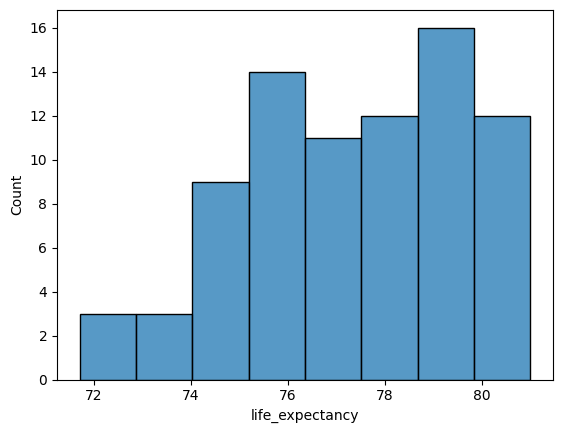

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure()
sns.histplot(data_without_zimb.life_expectancy)
plt.show()
plt.clf()

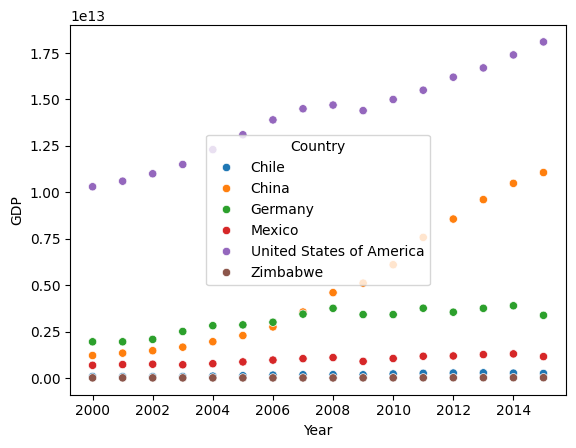

<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure()
sns.scatterplot(data = data, x = 'Year', y = 'GDP', hue = 'Country')
plt.show()
plt.clf()

In [12]:
data_without_zimb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          80 non-null     object 
 1   Year             80 non-null     int64  
 2   life_expectancy  80 non-null     float64
 3   GDP              80 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [13]:
overall_mean_life = np.mean(data['life_expectancy'])
print(overall_mean_life)

72.78958333333334


In [14]:
## Null Hyp: "The mean of the life expectancy overall is equal to 72.7"

## Alternate Hyp: "The mean of the life expectancy overall is not equal to 72.7"


random_sample = np.random.choice(data.life_expectancy, 10)
print(random_sample)

ttest, p_value = ttest_1samp(random_sample, popmean = 73)
print(p_value)

[71.7 80.1 75.4 75.  79.9 78.  45.3 75.7 75.8 75.6]
0.9394846528880587


In [15]:
if p_value < 0.05:
    print("Null Hypothesis is Rejected")
else:
    print("Null Hypothesis is not Rejected")

Null Hypothesis is not Rejected


In [16]:
## Make a function that iterates through the Country column and determine mean, afterwhich we will conduct a 1 sample t test and figure out if our null is true or not.

def hyp_test_country(df):
    set_of_countries = df['Country'].unique()
    sample_size = 10
    for country in set_of_countries:
        data_set = df[df.Country == str(country)]
        country_life_mean = np.mean(data_set['life_expectancy'])
        print(f'Mean of life expectancy in {country}: {country_life_mean}')
        print('\n')
        random_sample = np.random.choice(data_set.life_expectancy, sample_size)
        print(f'Random Sample of {country}: {random_sample}')
        print('\n')
        ttest, p_value = ttest_1samp(random_sample, round(float(country_life_mean), 1))
        print(f'P-Value of {country}: {p_value}')
        print('\n')
        if p_value < 0.05:
            print('Null Hypothesis is Rejected')
        else:
            print("Null Hypothesis is Accepted")
            
        print('\n')
        print('\n')
        

In [17]:
hyp_test_country(data)

## Null Hypothesis: "The mean of life expectancy in each country of a random sample is equal to the population mean."
## Alternate Hypothesis: "The mean of life expectancy in each country of a random sample is not equal to the population mean."

Mean of life expectancy in Chile: 78.94375


Random Sample of Chile: [79.9 78.4 79.3 78.4 79.6 79.1 78.4 79.1 78.4 77.3]


P-Value of Chile: 0.6571196362758347


Null Hypothesis is Accepted




Mean of life expectancy in China: 74.26249999999999


Random Sample of China: [74.2 75.  74.5 73.9 74.9 75.8 72.2 71.7 74.4 74.4]


P-Value of China: 0.6254958393104577


Null Hypothesis is Accepted




Mean of life expectancy in Germany: 79.65625


Random Sample of Germany: [78.  80.5 79.6 78.3 80.  79.6 79.2 78.4 79.8 80.9]


P-Value of Germany: 0.396028635216641


Null Hypothesis is Accepted




Mean of life expectancy in Mexico: 75.71875


Random Sample of Mexico: [76.6 76.  76.6 75.7 75.4 75.6 74.8 76.6 76.3 75. ]


P-Value of Mexico: 0.4685859496881065


Null Hypothesis is Accepted




Mean of life expectancy in United States of America: 78.0625


Random Sample of United States of America: [78.7 77.5 78.8 77.  79.3 78.7 77.8 77.5 77.  77.2]


P-Value of United States of America: 0.58936304

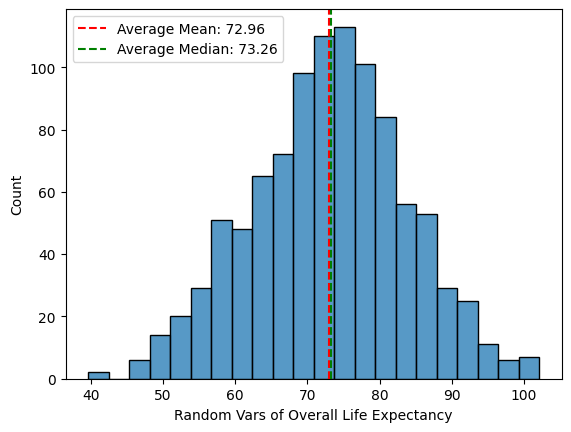

<Figure size 640x480 with 0 Axes>

In [96]:
## Normal Distribution of Overall Life Expectancy
std_life = np.std(data['life_expectancy'])
normal_dist_life = norm.rvs(loc = overall_mean_life, scale = std_life, size = 1000)

## Plotting Overall Life Expectancy
plt.figure()
sns.histplot(normal_dist_life)
plt.axvline(np.mean(normal_dist_life), color = 'red', linewidth = 1.5, linestyle = '--')
plt.axvline(np.median(normal_dist_life), color = 'green', linewidth = 1.5, linestyle = '--')
plt.legend([f'Average Mean: {round(np.mean(normal_dist_life), 2)}', f'Average Median: {round(np.median(normal_dist_life), 2)}'])
plt.xlabel('Random Vars of Overall Life Expectancy')
plt.savefig('overall_life.jpg')
plt.show()
plt.clf()

In [97]:
def norm_dist_country(df):
    set_of_countries = df['Country'].unique()
    sample_size = 10
    for country in set_of_countries:
        data_set = df[df.Country == str(country)]
        country_life_mean = np.mean(data_set['life_expectancy'])
        print(f'Mean of life expectancy in {country}: {country_life_mean}')
        country_life_std = np.std(data_set['life_expectancy'])
        print(f'Standard Deviation of life expectancy in {country}: {country_life_std}')
        country_life_median = np.median(data_set['life_expectancy'])
        norm_dist_life = norm.rvs(loc = country_life_mean, scale = country_life_std, size = 1000)
        plt.figure()
        sns.histplot(norm_dist_life)
        plt.axvline(country_life_mean, color = 'red', linewidth = 1.5, linestyle = '--')
        plt.axvline(country_life_median, color = 'green', linewidth = 1.5, linestyle = '--')
        plt.legend([f'Average Mean: {round(country_life_mean, 2)}', f'Average Median: {round(country_life_median, 2)}'])
        plt.xlabel(f'{country} Life Expectancy')
        plt.savefig(f'mean_median_{country}.jpg')
        plt.show()
        plt.clf()
        print("\n")
        

Mean of life expectancy in Chile: 78.94375
Standard Deviation of life expectancy in Chile: 1.0252857833306763


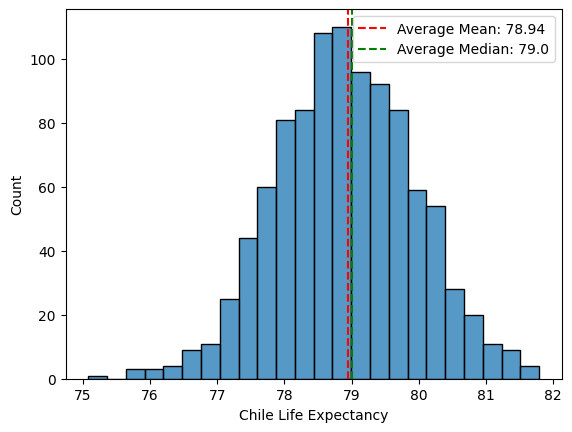



Mean of life expectancy in China: 74.26249999999999
Standard Deviation of life expectancy in China: 1.2761636846423727


<Figure size 640x480 with 0 Axes>

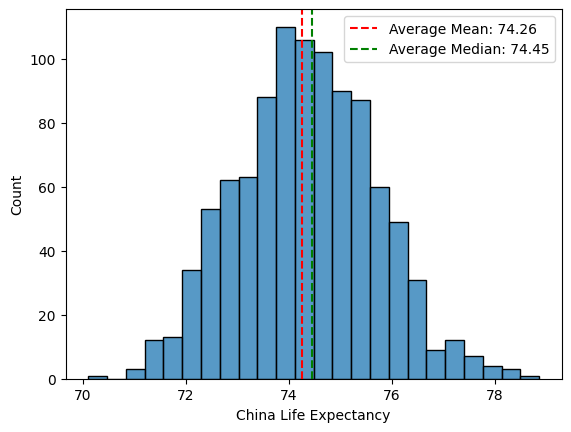



Mean of life expectancy in Germany: 79.65625
Standard Deviation of life expectancy in Germany: 0.9440396906380575


<Figure size 640x480 with 0 Axes>

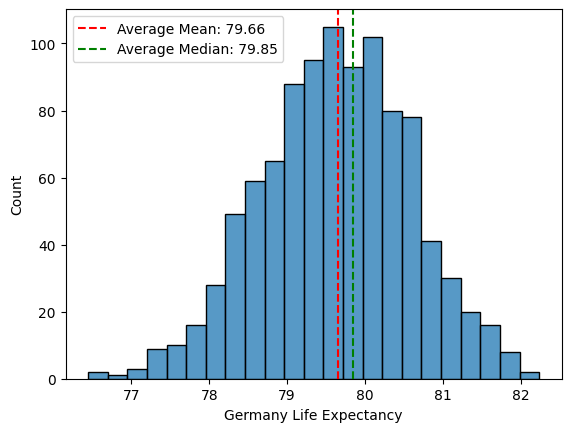



Mean of life expectancy in Mexico: 75.71875
Standard Deviation of life expectancy in Mexico: 0.6012681909930035


<Figure size 640x480 with 0 Axes>

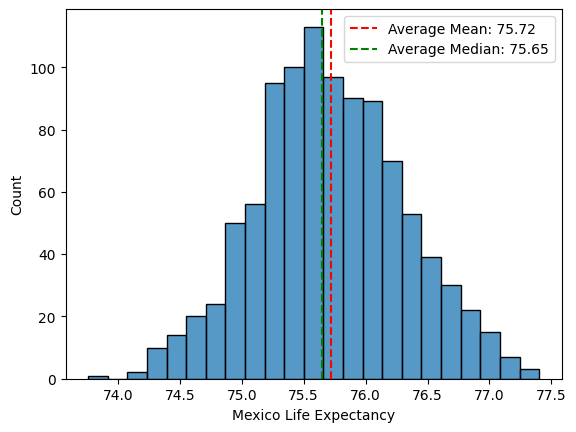



Mean of life expectancy in United States of America: 78.0625
Standard Deviation of life expectancy in United States of America: 0.8061288668693108


<Figure size 640x480 with 0 Axes>

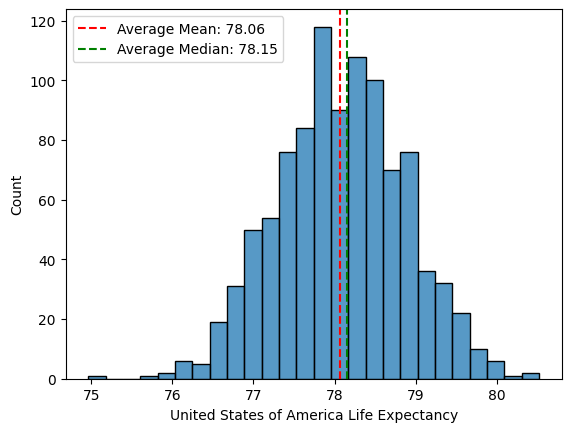



Mean of life expectancy in Zimbabwe: 50.09375
Standard Deviation of life expectancy in Zimbabwe: 5.751681140110255


<Figure size 640x480 with 0 Axes>

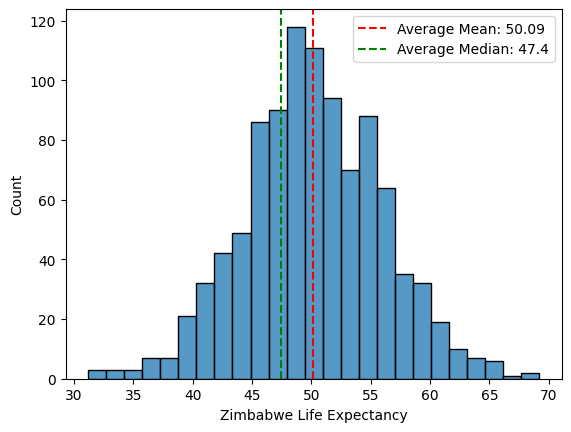

<Figure size 640x480 with 0 Axes>

In [98]:
norm_dist_country(data)
## From each graph representing each country, we can conclude that the most significant evenly distributed life expectancy is Chile
## Whereas the least significant is Zimbabwe
## Also, to note, that although these countries are above Zimbabwe, their evenly distributed life expectancy is, at some point, significant even though it seems to have an unreasonable amount of gap between mean and median

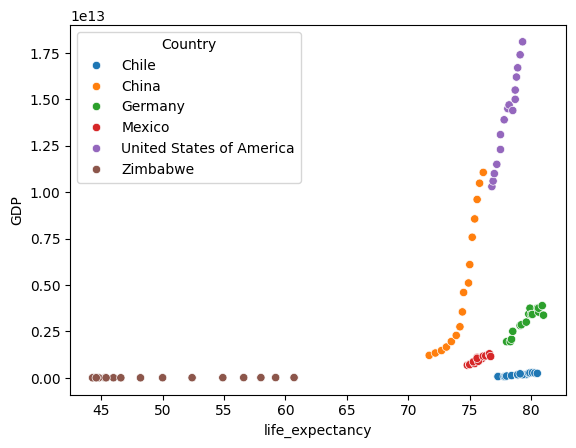

<Figure size 640x480 with 0 Axes>

In [93]:
plt.figure()
sns.scatterplot(data = data, x = 'life_expectancy', y = 'GDP', hue = 'Country')
plt.savefig('scatter_life_gdp')
plt.show()
plt.clf()
## From this, we can see that there is a correlation with life expectancy and the GDP.
## In one of the scatterplots, we see a huge jump. We can conclude that there is great relation with GDP of people whose ages are between 70 to 80.
## But the probability of this seems insignificant.

<Figure size 640x480 with 0 Axes>

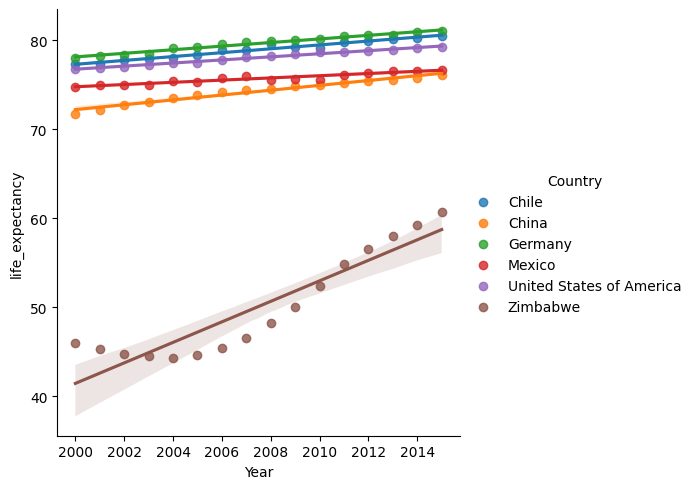

<Figure size 640x480 with 0 Axes>

In [91]:
plt.figure()
sns.lmplot(data = data, x = 'Year', y = 'life_expectancy', hue = 'Country')
plt.savefig('life_expectancy_countries.jpg')
plt.show()
plt.clf()

## All countries have a positive relation with the Life Expectancy over the years.
## Mexico seems to have an almost constant Life Expectancy. Despite of that, there is a slight positive progression in Mexico.
## With the linear regression formula, the prediction and actual results match up. This means the model for Life Expectancy over the years is proven itself.
## However Zimbabwe has a few outliers in its area due to the deterioration o standard living and economic growth from 2003 to 2010.

<Figure size 640x480 with 0 Axes>

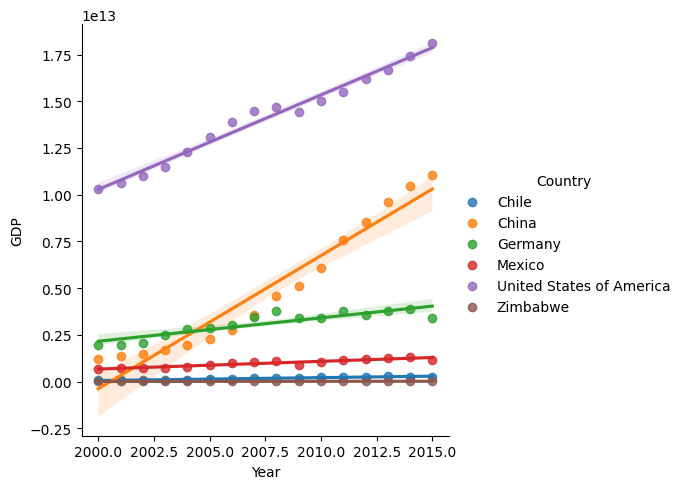

<Figure size 640x480 with 0 Axes>

In [92]:
plt.figure()
sns.lmplot(data = data, x = 'Year', y = 'GDP', hue = 'Country')
plt.savefig('GDP_countries.jpg')
plt.show()
plt.clf()

In [70]:
##Conclusions

## We learned throughout this process that for each country, there is a positive progression in GDP over the Years
## But in Zimbabwe there is the least amount of progression of GDP over the Years. This ultimately describes the economic problems that Zimbabwe faced over the Years and is making progression at an alarmingly slow rate.
## Although, the United States has clearly defined itself by having a huge positive progression rate on GDP rate, the fastest by far is China

## We learned throughout this process that for each country, there is a positive progression in Life Expectancy over the Years
## We see that, although there is positive progression, Zimbabwe lies under the average expectancy which is 73 years.
## Whereas, Germany holds the position as the highest average life expectancy rate at 80.5 years which is above the world average of 73 years.

##